<a href="https://colab.research.google.com/github/Gkulatheja/g_kulatheja/blob/master/FALL_DETECTING_USING_CNN_WITH_IMAGES_FOR_ELDERLY_PEOPLE_(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas tensorflow scikit-learn pillow matplotlib

# New section

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ggyfNCLR8mH4U0ZjKozm")
project = rf.workspace("roboflow-universe-projects").project("fall-detection-ca3o8")
version = project.version(4)
dataset = version.download("coco")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fall-Detection-4 in coco:: 100%|██████████| 10794/10794 [00:04<00:00, 2261.80it/s]


In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Compress your folder into a zip file
# For example, if your folder is named "my_images", compress it to "my_images.zip" on your local machine.

# Step 2: Upload the zip file to Colab
uploaded = files.upload()

# Step 3: Unzip the uploaded folder
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/')
        print(f"Extracted '{filename}' to '/content/'")

# Optional: List the contents of the extracted folder to confirm
extracted_folder = filename.replace('.zip', '')
print("Extracted folder contents:")
print(os.listdir(f"/content/{extracted_folder}"))


Saving Fall.zip to Fall.zip
Extracted 'Fall.zip' to '/content/'
Extracted folder contents:
['test_images', 'train_labels.csv', 'train_images', 'test_labels.csv']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6184 - loss: 0.6062 - val_accuracy: 1.0000 - val_loss: 0.2391
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 897ms/step - accuracy: 0.9380 - loss: 0.2213 - val_accuracy: 1.0000 - val_loss: 0.0364
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9548 - loss: 0.1017 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 874ms/step - accuracy: 0.9682 - loss: 0.0907 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9876 - loss: 0.0405 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9988 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 889ms/step - accuracy: 0.9932 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 7.1021e-05
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9932 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 2.0188e-0

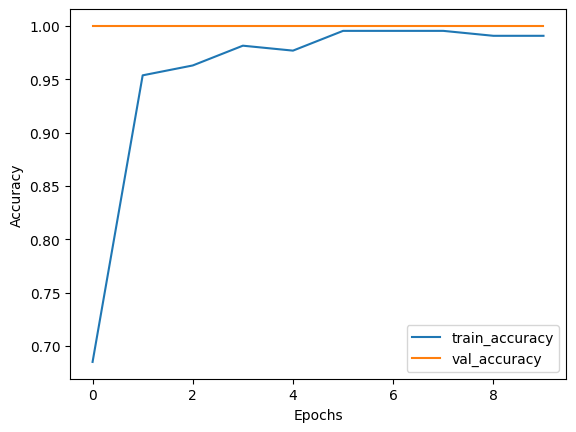

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import matplotlib.pyplot as plt

# Parameters
image_size = (128, 128)  # Set desired image size
batch_size = 32
epochs = 10

# Paths to train and test CSV files and image folders
train_csv_path = '/content/Fall/train_labels.csv'  # Adjust the path
test_csv_path = '/content/Fall/test_labels.csv'    # Adjust the path
train_image_dir = '/content/Fall/train_images'  # Adjust the path
test_image_dir = '/content/Fall/test_images'    # Adjust the path

# Load the train and test CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Function to load images and labels from CSV file
def load_data(dataframe, image_dir):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        img_path = os.path.join(image_dir, row['images'])
        if os.path.exists(img_path):
            img = Image.open(img_path).resize(image_size)
            images.append(np.array(img))
            labels.append(row['labels'])
    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)          # Convert labels to numpy array
    return images, labels

# Load training and testing data
X_train, y_train = load_data(train_df, train_image_dir)
X_test, y_test = load_data(test_df, test_image_dir)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Single output neuron with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import smtplib
import os
from email.message import EmailMessage
import ssl

# Function to preprocess the image
def preprocess_image(img_path, image_size=(128, 128)):
    img = Image.open(img_path)
    img = img.resize(image_size)  # Resize image to match the input shape of the model
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img  # Return both the array and the original resized image

# Function to send an email with the image attachment
def send_fall_alert(image_path):
    # Email credentials
    email_address = "ambatijayacharan18@gmail.com"
    email_password = "jnzu ewoa orde weyx"
    guardian_email = "99220041224@klu.ac.in"

    # Create the email message
    msg = EmailMessage()
    msg['Subject'] = "Fall Detected Alert!"
    msg['From'] = email_address
    msg['To'] = guardian_email
    msg.set_content("A fall has been detected. Please check on the individual immediately.\nThe attached image shows the detected fall.")

    # Attach the image
    with open(image_path, 'rb') as img_file:
        img_data = img_file.read()
        msg.add_attachment(img_data, maintype='image', subtype='jpeg', filename='fall_detected.jpg')

    try:
        # Establish a secure session with Gmail's SMTP server
        context = ssl.create_default_context()
        with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as server:
            server.login(email_address, email_password)
            server.send_message(msg)
            print("Fall alert email with image sent successfully.")
    except smtplib.SMTPAuthenticationError:
        print("Authentication error: Check your email credentials.")
        print("If you have 2-Step Verification enabled, use an App Password instead.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Path to the new image for prediction
new_image_path = '/content/Fall/test_images/fall-03-cam1-rgb-196.jpg'  # Adjust the path as needed

# Preprocess the image
preprocessed_image, resized_image = preprocess_image(new_image_path)

# Save the resized image temporarily
temp_image_path = '/content/temp_fall_image.jpg'
resized_image.save(temp_image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)

# Interpret the prediction and send an alert if a fall is detected
if prediction[0][0] > 0.5:
    print("Prediction: Fall detected.")
    send_fall_alert(temp_image_path)  # Send email notification with the image
else:
    print("Prediction: Not Fall.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: Fall detected.
Fall alert email with image sent successfully.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import json
import os
import matplotlib.pyplot as plt

# Enable mixed precision if GPU allows
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load COCO annotations
def load_coco_data(annotation_file):
    with open(annotation_file, 'r') as f:
        data = json.load(f)
    return data

# Optimized data pipeline
def preprocess_coco_dataset(data, image_dir, label_map, img_size=(224, 224), batch_size=16):
    def process_annotation(annotation):
        image_id = annotation['image_id']
        label = label_map[annotation['category_id']]
        image_info = next(item for item in data['images'] if item['id'] == image_id)
        image_path = os.path.join(image_dir, image_info['file_name'])

        # Load and preprocess image
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        return img, label

    dataset = tf.data.Dataset.from_generator(
        lambda: (process_annotation(ann) for ann in data['annotations']),
        output_signature=(
            tf.TensorSpec(shape=(224, 224, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )
    return dataset.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Paths to datasets and COCO annotation files
train_annotation_file = '/content/Fall-Detection-4/train/_annotations.coco.json'
valid_annotation_file = '/content/Fall-Detection-4/valid/_annotations.coco.json'
train_image_dir = '/content/Fall-Detection-4/train'
valid_image_dir = '/content/Fall-Detection-4/valid'

# Define label map (adjust as needed)
label_map = {1: 1, 0: 0}  # Example: {fall: 1, no fall: 0}

# Load and preprocess datasets
train_data = load_coco_data(train_annotation_file)
valid_data = load_coco_data(valid_annotation_file)

batch_size = 16
train_dataset = preprocess_coco_dataset(train_data, train_image_dir, label_map, batch_size=batch_size)
valid_dataset = preprocess_coco_dataset(valid_data, valid_image_dir, label_map, batch_size=batch_size)

steps_per_epoch = len(train_data['annotations']) // batch_size
validation_steps = len(valid_data['annotations']) // batch_size

# Define CNN model using transfer learning with ResNet50
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze the base model

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)  # Reduced complexity
    predictions = Dense(1, activation='sigmoid', dtype='float32')(x)  # Set dtype to float32

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

model = create_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10,  # Reduced max epochs
                    steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
                    callbacks=[early_stopping])

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
590/590 ━━━━━━━━━━━━━━━━━━━━ 2920s 5s/step - accuracy: 0.9890 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 1.0459e-08
Epoch 2/10
  1/590 ━━━━━━━━━━━━━━━━━━━━ 2:59 304ms/step - accuracy: 1.0000 - loss: 4.2361e-09

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.


590/590 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.2361e-09 - val_accuracy: 1.0000 - val_loss: 8.3044e-09
Epoch 3/10
247/590 ━━━━━━━━━━━━━━━━━━━━ 25:13 4s/step - accuracy: 1.0000 - loss: 1.1021e-08